# HW 5- Parsing with Pandas and Plotting with Seaborn

- Download the Actionability file.
- Parse based on the following:
1. Words EGFR, FGFR1, and 'lung/carcinoma/non small cell carcinoma'.
2. Gene, Mutation, Disease, Action Rank, Drug Name, Source of Info, Primary Outcome.
3. Create output file.
- Create new parsed file that consist of gene name, disease, mutation and development status.
1. Create plot and histogram based on mutation and development status. 
2. Create plot drug combination and primary outcome measure.

##### My Thoughts:
- Use pandas to create a data frame from my output file
- Use pandas to create my histogram using the hist() method
- Use seaborn or matplotlib for scatter plot

1. I will create a function that will open the actionability file
2. For each line, if it has EGFR, FGFR1 or 'lung/carcinoma/non small cell carcinoma', I will write it to my output file. I could potentially do this with regex

In [1]:
#first I need to import the libraries I need for parsing and creating plots. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

def parseFile(file):
    #first I need to open and read the actionability file
    #I will read this into a dataframe using pandas and parse the dataframe
   
    df = pd.read_table(file)
    #display(df)

    # if df.empty: #conditional statement to check to see if my dataframe works, can read in the file into a dataframe
    #     print('empty')
    # if not df.empty:
    #     display(df)
    pattern = r'\b(EGFR|FGFR1|lung / carcinoma / non small cell carcinoma)\b'#the \b ensures that the whole words are matched
    #this is our regular expression pattern used for searching
    #parsing the file based on: Words EGFR, FGFR1, and 'lung/carcinoma/non small cell carcinoma'
    filtered_df = df[df.apply(lambda row: any(re.search(pattern, str(cell)) for cell in row), axis=1)]
    #I am filtering my dataframe based on my regex pattern. Which will match EGFR, FGFR1 or 'lung / carcinoma / non small cell carcinoma'
    #axis =1 specifies we will be going throught the rows.

    output_df = filtered_df.iloc[:,[0,filtered_df.columns.get_loc('DISEASE') , filtered_df.columns.get_loc('MUTATION_REMARK'), filtered_df.columns.get_loc('ACTIONABILITY_RANK'), 
                                    filtered_df.columns.get_loc('DRUG_COMBINATION'), filtered_df.columns.get_loc('SOURCE'), filtered_df.columns.get_loc('PRIMARY_OUTCOME_MEASURE'),]]
    #Parsing based on Gene, Mutation_REMARK, Disease, ACTIONABILITY_RANK, DRUG_COMBINATION, Source of Info, Primary Outcome.

    output_file = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Homeworks\HW5\HW5_output.txt'
    #specify the output file path 
    
    output_df.to_csv(output_file, index=False, sep='\t') 
    #this is to export our filted_df into a text file
    
    display(output_df)
    #display data for viewing purposes

In [2]:
file = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Homeworks\HW5\ActionabilityData.txt'
#this is the path for my file

parseFile(file)
#testing our function

C:\Users\tiffa\AppData\Local\Temp\ipykernel_3620\2899771446.py:12: DtypeWarning: Columns (27,28,30,34,44,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(file)


,,DISEASE,MUTATION_REMARK,ACTIONABILITY_RANK,DRUG_COMBINATION,SOURCE,PRIMARY_OUTCOME_MEASURE
28,EGFR,lung / carcinoma / non small cell carcinoma,(EGFR_Exon19del or EGFR_L858R or EGFR_T790M) a...,3,Osimertinib + Savolitinib,NCT05261399,Progression free survival
29,EGFR,lung / carcinoma / non small cell carcinoma,(EGFR_Exon19del or EGFR_L858R) and CD274_unspe...,3,Alflutinib,NCT05255406,Progression free survival
30,EGFR,lung / carcinoma / non small cell carcinoma,(EGFR_Exon19del or EGFR_L858R) and CD274_unspe...,3,Bevacizumab + Cisplatin + Pemetrexed + Tisleli...,NCT05394233,Progression free survival
31,EGFR,lung / carcinoma / non small cell carcinoma,(EGFR_Exon19del or EGFR_L858R) and MET_unspeci...,3,Erlotinib + Telisotuzumab vedotin,10.1200/JCO.2019.37.15_suppl.3011,Maximum tolerated dose/toxicity
32,EGFR,lung / carcinoma / non small cell carcinoma,(EGFR_Exon19del or EGFR_L858R) and MET_unspeci...,3,Capmatinib + Erlotinib,NCT02468661,Maximum tolerated dose/toxicity
...,...,...,...,...,...,...,...
9308,VEGFA,lung / carcinoma / non small cell carcinoma,VEGFA_unspecified,3,Vandetanib,10.1200/JCO.2021.39.15_suppl.9095,Progression free survival
9309,VEGFA,lung / carcinoma / non small cell carcinoma,VEGFA_unspecified,3,Erlotinib + Sunitinib,NCT00265317,Progression free survival
9310,VEGFA,lung / carcinoma / non small cell carcinoma,VEGFA_unspecified,3,Sunitinib,NCT00372775,Progression free survival
9395,WT1,lung / carcinoma / non small cell carcinoma,WT1_unspecified,3,WT2725,34785698,Maximum tolerated dose/toxicity


I needed to get rid of the tick mark labels on my plots or else they were overlapping and looking too crazy. 

In [3]:
#I will be using the parsed file created by the previous function as the input for this plotting function
#this is redundant as I have imported the libraries above
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plotFile(file):
    df = pd.read_table(file)
    #read in the file and make it into a data frame
    filtered_df = df.iloc[:,[0,df.columns.get_loc('DISEASE') , df.columns.get_loc('MUTATION_REMARK'), df.columns.get_loc('DEVELOPMENT_STATUS')]]
    #filtering for specific column names
    #parsing based on gene name, disease, mutation and development statusgene name, disease, mutation and development status.
    #display(filtered_df)#displaying my dataframe just to check

    output_plot_file = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Homeworks\HW5\HW5_plot_file.txt'
    #specify the output file path for our newly parsed file 
    
    filtered_df.to_csv(output_plot_file, index=False, sep='\t') #this is to export our filtered file for plotting into a text file

    #display(filtered_df) #to display my data fram before I plot it
    
    #plot scatterplot for Mutation_remark vs Actionability_rank
    #this is based on the jupyter notebook given in class
    
    #I AM PLOTTING THE FIGURES BASED ON THE ORIGINAL ACTIONABILITY FILE!
    plt.figure()
    gene_set = set(df.iloc[:, 0])
    for gene in gene_set:
        selected_data = df.loc[df.iloc[:, 0] == gene]
        plt.scatter(selected_data['MUTATION_REMARK'], selected_data['ACTIONABILITY_RANK'])
    plt.xlabel('MUTATION_REMARK')
    plt.ylabel('ACTIONABILITY_RANK')
    plt.xticks([]) #get rid of x tick marks
    plt.title('Scatterplot of Mutation Remark vs Actionability Rank')
    plt.show()

    #plot bar chart for mutation_remark vs actionability_rank
    plt.figure()
    sns.barplot(data=df, x='MUTATION_REMARK', y='ACTIONABILITY_RANK')
    plt.title('Actionability Rank by Mutation Remark')
    plt.xlabel('Mutation Remark')
    plt.ylabel('Actionability Rank')
    plt.xticks([]) #get rid of x tick marks
    plt.show()


    #This will be for drug combination and primary outcome measure
    #first I need to clean up the "DRUG_COMBINATION" column and get rid of all NaN values
    df.dropna(subset=['DRUG_COMBINATION'], inplace=True)
    df.dropna(subset=['PRIMARY_OUTCOME_MEASURE'], inplace=True)
    plt.figure()
    #This part of the plotting code is taken from the lecture notes
    gene_set = set(df.iloc[:, 0])
    for gene in gene_set:
        selected_data = df.loc[df.iloc[:, 0] == gene]
        plt.scatter(selected_data['DRUG_COMBINATION'], selected_data['PRIMARY_OUTCOME_MEASURE'])
    
    plt.xlabel('DRUG_COMBINATION')
    plt.ylabel('PRIMARY_OUTCOME_MEASURE')
    plt.xticks([]) #get rid of x tick marks
    plt.yticks([]) #get rid of y tick marks
    plt.show()

C:\Users\tiffa\AppData\Local\Temp\ipykernel_3620\3210671449.py:8: DtypeWarning: Columns (27,28,30,34,44,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(file)


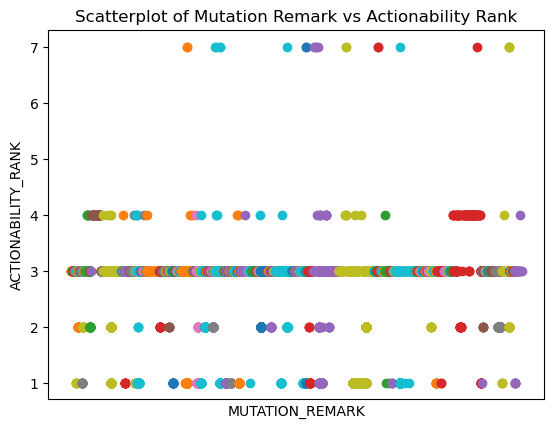

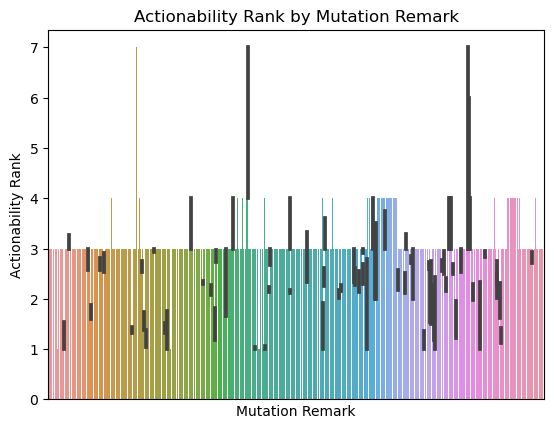

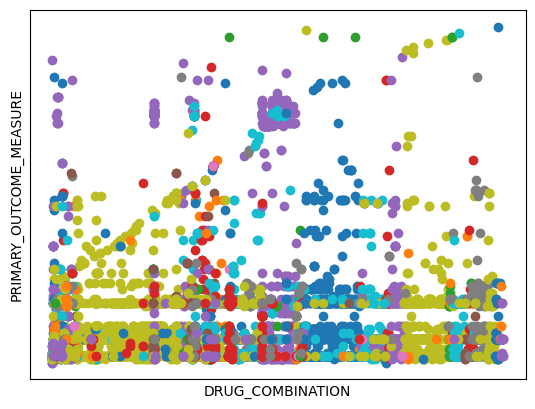

In [4]:

parsed_file= r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Homeworks\HW5\ActionabilityData.txt'
plotFile(parsed_file)
#test my function
